# Series

In [116]:
import pandas as pd
import numpy as np

In [38]:
revenues = pd.Series([555, 7000, 1980])
revenues

0     555
1    7000
2    1980
dtype: int64

In [39]:
revenues.index

RangeIndex(start=0, stop=3, step=1)

In [40]:
city_revenues = pd.Series([555, 7000, 1980], index=['Amsterdam','Tokyo','Beijing'])
city_revenues

Amsterdam     555
Tokyo        7000
Beijing      1980
dtype: int64

In [191]:
city_employee_count = pd.Series({'Amsterdam':5,'Tokyo':8})
city_employee_count

Amsterdam    5
Tokyo        8
dtype: int64

In [192]:
city_data = pd.DataFrame({'revenue':city_revenues,'employee_count':city_employee_count})
city_data

revenue  employee_count
Amsterdam      555             5.0
Beijing       1980             NaN
Tokyo         7000             8.0

In [193]:
city_data.columns

Index(['revenue', 'employee_count'], dtype='object')

In [194]:
city_data.index

Index(['Amsterdam', 'Beijing', 'Tokyo'], dtype='object')

# Concat & Merge

In [5]:
further_city_data = pd.DataFrame({'revenue':[7000,3400],'employee_count':[2,2]},index=['New York','Barcelona'])
further_city_data

revenue  employee_count
New York      7000               2
Barcelona     3400               2

In [195]:
city_data

revenue  employee_count
Amsterdam      555             5.0
Beijing       1980             NaN
Tokyo         7000             8.0

## Concat Vertikal

In [196]:
all_city_data = pd.concat([city_data,further_city_data])
all_city_data

revenue  employee_count
Amsterdam      555             5.0
Beijing       1980             NaN
Tokyo         7000             8.0
New York      7000             2.0
Barcelona     3400             2.0

## Concat Horizontal

In [8]:
city_countries = pd.DataFrame({'country':['Holland','Japan','Holland','Canada','Spain'],
                              'capital':[1,1,0,0,0]},
                             index=['Amsterdam','Tokyo','Rotterdam','Toronto','Barcelona'])
city_countries

country  capital
Amsterdam  Holland        1
Tokyo        Japan        1
Rotterdam  Holland        0
Toronto     Canada        0
Barcelona    Spain        0

In [197]:
cities = pd.concat([all_city_data,city_countries],axis=1)
cities

revenue  employee_count  country  capital
Amsterdam    555.0             5.0  Holland      1.0
Beijing     1980.0             NaN      NaN      NaN
Tokyo       7000.0             8.0    Japan      1.0
New York    7000.0             2.0      NaN      NaN
Barcelona   3400.0             2.0    Spain      0.0
Rotterdam      NaN             NaN  Holland      0.0
Toronto        NaN             NaN   Canada      0.0

### join inner hanya menampilkan data yang ada pada concat

In [198]:
pd.concat([all_city_data,city_countries],axis=1,join='inner')

revenue  employee_count  country  capital
Amsterdam      555             5.0  Holland        1
Tokyo         7000             8.0    Japan        1
Barcelona     3400             2.0    Spain        0

# Merge
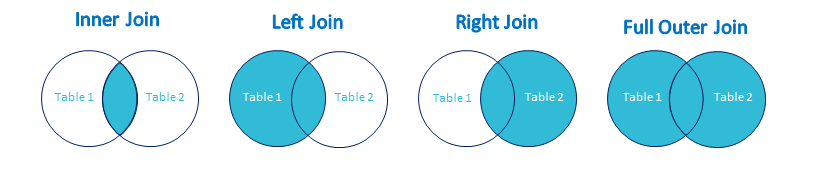

In [12]:
countries = pd.DataFrame({'population_mil':[17,127,37],
                         'continent':["Europe",'Asia','North America']},index=['Holland','Japan','Canada'])
countries

population_mil      continent
Holland              17         Europe
Japan               127           Asia
Canada               37  North America

In [16]:
countries2 = pd.DataFrame({'population_mil':[17,127,37],
                         'continent':["Europe",'Asia','North America'],
                          'country':['Holland','Japan','Canada']})
countries2

population_mil      continent  country
0              17         Europe  Holland
1             127           Asia    Japan
2              37  North America   Canada

In [199]:
cities

revenue  employee_count  country  capital
Amsterdam    555.0             5.0  Holland      1.0
Beijing     1980.0             NaN      NaN      NaN
Tokyo       7000.0             8.0    Japan      1.0
New York    7000.0             2.0      NaN      NaN
Barcelona   3400.0             2.0    Spain      0.0
Rotterdam      NaN             NaN  Holland      0.0
Toronto        NaN             NaN   Canada      0.0

### Inner

In [200]:
cities.merge(countries2,on='country',how='inner')

revenue  employee_count  country  capital  population_mil      continent
0    555.0             5.0  Holland      1.0              17         Europe
1      NaN             NaN  Holland      0.0              17         Europe
2   7000.0             8.0    Japan      1.0             127           Asia
3      NaN             NaN   Canada      0.0              37  North America

### Left

In [201]:
cities.merge(countries2,on='country',how='left')

revenue  employee_count  country  capital  population_mil      continent
0    555.0             5.0  Holland      1.0            17.0         Europe
1   1980.0             NaN      NaN      NaN             NaN            NaN
2   7000.0             8.0    Japan      1.0           127.0           Asia
3   7000.0             2.0      NaN      NaN             NaN            NaN
4   3400.0             2.0    Spain      0.0             NaN            NaN
5      NaN             NaN  Holland      0.0            17.0         Europe
6      NaN             NaN   Canada      0.0            37.0  North America

### Right

In [202]:
cities.merge(countries2,on='country',how='right')

revenue  employee_count  country  capital  population_mil      continent
0    555.0             5.0  Holland      1.0              17         Europe
1      NaN             NaN  Holland      0.0              17         Europe
2   7000.0             8.0    Japan      1.0             127           Asia
3      NaN             NaN   Canada      0.0              37  North America

### Outer

In [203]:
cities.merge(countries2,on='country',how='outer')

revenue  employee_count  country  capital  population_mil      continent
0    555.0             5.0  Holland      1.0            17.0         Europe
1      NaN             NaN  Holland      0.0            17.0         Europe
2   1980.0             NaN      NaN      NaN             NaN            NaN
3   7000.0             2.0      NaN      NaN             NaN            NaN
4   7000.0             8.0    Japan      1.0           127.0           Asia
5   3400.0             2.0    Spain      0.0             NaN            NaN
6      NaN             NaN   Canada      0.0            37.0  North America

# Data Cleansing with Pandas

In [207]:
df=pd.read_csv('property_data.csv')
df

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800

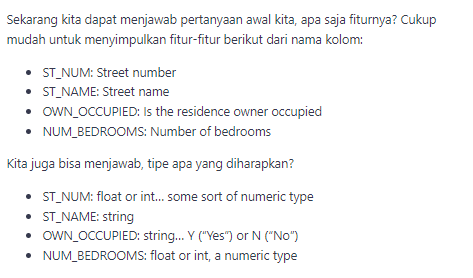

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


### mengecek summary dari null

In [209]:
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [210]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [211]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

### mengisi value NaN

In [212]:
df['ST_NUM'].fillna(0)

0    104.0
1    197.0
2      0.0
3    201.0
4    203.0
5    207.0
6      0.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

## Non Standard Missing Values

In [213]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [214]:
df['NUM_BEDROOMS'].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

### filtering data nul yg anomali, yg tidak data null dari python jadi NaN

In [215]:
missing_values = ['--','na','n/a']
df2=pd.read_csv('property_data.csv',na_values=missing_values)
df2

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY           12           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           NaN        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0

In [37]:
df

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800

In [216]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [42]:
np.nan

nan

In [43]:
type(np.nan)
#nan itu data angka tapi emang gada isinya, isinya desimal

float

In [44]:
int('23')

23

In [217]:
int('Y')

ValueError: invalid literal for int() with base 10: 'Y'

In [218]:
df2

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY           12           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           NaN        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0

In [219]:
cnt=0  #representasi dari index
for row in df2['OWN_OCCUPIED']:
    try:
        int(row)
        df2.loc[cnt,'OWN_OCCUPIED'] = np.nan
    except ValueError: #kalau error langsung lanjut ke operasi di for
        pass
    cnt+=1

In [220]:
df2

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY          NaN           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           NaN        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0

In [48]:
df.loc[0,'OWN_OCCUPIED']

'Y'

In [49]:
df.loc[3,'OWN_OCCUPIED']

'12'

In [222]:
#bisa ngambil kolom
df.loc[df.ST_NUM>200, 'ST_NAME']

3    BERKELEY
4    BERKELEY
5    BERKELEY
7     TREMONT
8     TREMONT
Name: ST_NAME, dtype: object

In [223]:
# misal rubah isinya
df.loc[df.ST_NUM>200, 'ST_NAME'] = '200 ST'
df.loc[df.ST_NUM>200, 'ST_NAME']

3    200 ST
4    200 ST
5    200 ST
7    200 ST
8    200 ST
Name: ST_NAME, dtype: object

In [224]:
df.loc[3,'OWN_OCCUPIED'] = np.nan
df

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0      200 ST          NaN            1      NaN   700
4          NaN   203.0      200 ST            Y            3        2  1600
5  100006000.0   207.0      200 ST            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0      200 ST            Y           --        1   NaN
8  100009000.0   215.0      200 ST            Y           na        2  1800

### untuk pengecekan jumlah value null per masing-masing kolom

In [225]:
df2.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

### Untuk pengecekan jumlah null pada seluruh kolom

In [226]:
df2.isna().sum().sum()

12

### untuk pengecekan apakah ada null di tabel

In [227]:
df2.isna().values.any()

True

## Filling Nul with Median/Mean

In [228]:
df2

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           NaN        1   850.0
3  100004000.0   201.0    BERKELEY          NaN           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           NaN        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           NaN        1     NaN
8  100009000.0   215.0     TREMONT            Y           NaN        2  1800.0

In [229]:
df2.NUM_BEDROOMS

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [230]:

df2['NUM_BEDROOMS'].median()

3.0

In [231]:
# ngefillna di num bed
df2['NUM_BEDROOMS'].fillna(df2['NUM_BEDROOMS'].median(), inplace=True)
df2

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH   SQ_FT
0  100001000.0   104.0      PUTNAM            Y           3.0        1  1000.0
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5     NaN
2  100003000.0     NaN   LEXINGTON            N           3.0        1   850.0
3  100004000.0   201.0    BERKELEY          NaN           1.0      NaN   700.0
4          NaN   203.0    BERKELEY            Y           3.0        2  1600.0
5  100006000.0   207.0    BERKELEY            Y           3.0        1   800.0
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   950.0
7  100008000.0   213.0     TREMONT            Y           3.0        1     NaN
8  100009000.0   215.0     TREMONT            Y           3.0        2  1800.0

# QUIZ 1
Replace value null pada kolom SQ_FT dengan value mean nya

In [77]:
df2['SQ_FT'].fillna(df2['SQ_FT'].mean(), inplace=True)
df2

PID  ST_NUM     ST_NAME OWN_OCCUPIED  NUM_BEDROOMS NUM_BATH  \
0  100001000.0   104.0      PUTNAM            Y           3.0        1   
1  100002000.0   197.0   LEXINGTON            N           3.0      1.5   
2  100003000.0     NaN   LEXINGTON            N           3.0        1   
3  100004000.0   201.0    BERKELEY           12           1.0      NaN   
4          NaN   203.0    BERKELEY            Y           3.0        2   
5  100006000.0   207.0    BERKELEY            Y           3.0        1   
6  100007000.0     NaN  WASHINGTON          NaN           2.0   HURLEY   
7  100008000.0   213.0     TREMONT            Y           3.0        1   
8  100009000.0   215.0     TREMONT            Y           3.0        2   

    SQ_FT  OWN_OCUPPIED  
0  1000.0           NaN  
1  1100.0           NaN  
2   850.0           NaN  
3   700.0           NaN  
4  1600.0           NaN  
5   800.0           NaN  
6   950.0           NaN  
7  1100.0           NaN  
8  1800.0           NaN

# Analyzing Obesity

In [87]:
%matplotlib inline
data=pd.ExcelFile('obes.xls')

In [88]:
data

In [90]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [232]:
data_age=data.parse(u'7.2', skiprows=4, skipfooter=4)
data_age

Unnamed: 0    Total  Under 16  \
0                                                 NaN      NaN       NaN   
1                                             2002/03   1275.0     400.0   
2                                             2003/04   1711.0     579.0   
3                                             2004/05   2035.0     547.0   
4                                             2005/06   2564.0     583.0   
5                                             2006/07   3862.0     656.0   
6                                             2007/08   5018.0     747.0   
7                                             2008/09   7988.0     775.0   
8                                             2009/10  10571.0     632.0   
9                                             2010/11  11574.0     525.0   
10                                            2011/12  11736.0     495.0   
11                                            2012/13  10957.0     556.0   
12                                                NaN      NaN       NaN   
13  1.  A finished admission episode (FAE) is the ...      NaN       NaN   
14  2.  The primary diagnosis is the first of up t...      NaN       NaN   
15                   3.  ICD-10 Codes: E66 - Obesity.      NaN       NaN   
16  4.  Figures have not been adjusted for shortfa...      NaN       NaN   
17  5.  Counts include people resident in English ...      NaN       NaN   
18  6.  Total includes admissions where the age wa...      NaN       NaN   
19  7.  The quality and coverage of HES data have ...      NaN       NaN   
20  8.The data presented in this report are for in...      NaN       NaN   
21                                                NaN      NaN       NaN   

    16-24   25-34   35-44   45-54   55-64  65-74  75 and over  
0     NaN     NaN     NaN     NaN     NaN    NaN          NaN  
1    65.0   136.0   289.0   216.0    94.0   52.0         23.0  
2    67.0   174.0   391.0   273.0   151.0   52.0         24.0  
3   107.0   287.0   487.0   364.0   174.0   36.0         32.0  
4    96.0   341.0   637.0   554.0   258.0   72.0         20.0  
5   184.0   461.0  1069.0   872.0   459.0  118.0         43.0  
6   228.0   564.0  1469.0  1198.0   598.0  157.0         53.0  
7   322.0  1013.0  2359.0  2133.0  1099.0  221.0         63.0  
8   361.0  1348.0  3132.0  3076.0  1555.0  378.0         87.0  
9   375.0  1425.0  3277.0  3573.0  1820.0  456.0        115.0  
10  391.0  1484.0  3104.0  3581.0  2119.0  468.0         94.0  
11  356.0  1437.0  2744.0  3305.0  1965.0  495.0         99.0  
12    NaN     NaN     NaN     NaN     NaN    NaN          NaN  
13    NaN     NaN     NaN     NaN     NaN    NaN          NaN  
14    NaN     NaN     NaN     NaN     NaN    NaN          NaN  
15    NaN     NaN     NaN     NaN     NaN    NaN          NaN  
16    NaN     NaN     NaN     NaN     NaN    NaN          NaN  
17    NaN     NaN     NaN     NaN     NaN    NaN          NaN  
18    NaN     NaN     NaN     NaN     NaN    NaN          NaN  
19    NaN     NaN     NaN     NaN     NaN    NaN          NaN  
20    NaN     NaN     NaN     NaN     NaN    NaN          NaN  
21    NaN     NaN     NaN     NaN     NaN    NaN          NaN

In [92]:
data_age.head()

Unnamed: 0   Total  Under 16  16-24  25-34  35-44  45-54  55-64  65-74  \
0        NaN     NaN       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1    2002/03  1275.0     400.0   65.0  136.0  289.0  216.0   94.0   52.0   
2    2003/04  1711.0     579.0   67.0  174.0  391.0  273.0  151.0   52.0   
3    2004/05  2035.0     547.0  107.0  287.0  487.0  364.0  174.0   36.0   
4    2005/06  2564.0     583.0   96.0  341.0  637.0  554.0  258.0   72.0   

   75 and over  
0          NaN  
1         23.0  
2         24.0  
3         32.0  
4         20.0

### drop all null

In [236]:
data_age.dropna(inplace=True)
data_age

Year    Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
1   2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2   2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
3   2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
4   2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
5   2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
6   2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
7   2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
8   2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
9   2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
10  2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
11  2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0  495.0   

    75 and over  
1          23.0  
2          24.0  
3          32.0  
4          20.0  
5          43.0  
6          53.0  
7          63.0  
8          87.0  
9         115.0  
10         94.0  
11         99.0

### Rename column

In [237]:
data_age.rename(columns={'Unnamed: 0' : 'Year'}, inplace=True)
data_age

Year    Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
1   2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2   2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
3   2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
4   2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
5   2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
6   2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
7   2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
8   2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
9   2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
10  2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
11  2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0  495.0   

    75 and over  
1          23.0  
2          24.0  
3          32.0  
4          20.0  
5          43.0  
6          53.0  
7          63.0  
8          87.0  
9         115.0  
10         94.0  
11         99.0

### Set Index

In [238]:
data_age.set_index('Year',inplace=True)
data_age

Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
Year                                                                       
2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0  495.0   

         75 and over  
Year                  
2002/03         23.0  
2003/04         24.0  
2004/05         32.0  
2005/06         20.0  
2006/07         43.0  
2007/08         53.0  
2008/09         63.0  
2009/10         87.0  
2010/11        115.0  
2011/12         94.0  
2012/13         99.0

### Reset Index

In [239]:
data_age.reset_index()

Year    Total  Under 16  16-24   25-34   35-44   45-54   55-64  65-74  \
0   2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   52.0   
1   2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   52.0   
2   2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   36.0   
3   2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   72.0   
4   2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0  118.0   
5   2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0  157.0   
6   2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0  221.0   
7   2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0  378.0   
8   2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0  456.0   
9   2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0  468.0   
10  2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.0  495.0   

    75 and over  
0          23.0  
1          24.0  
2          32.0  
3          20.0  
4          43.0  
5          53.0  
6          63.0  
7          87.0  
8         115.0  
9          94.0  
10         99.0

# Plot

<AxesSubplot:xlabel='Year'>

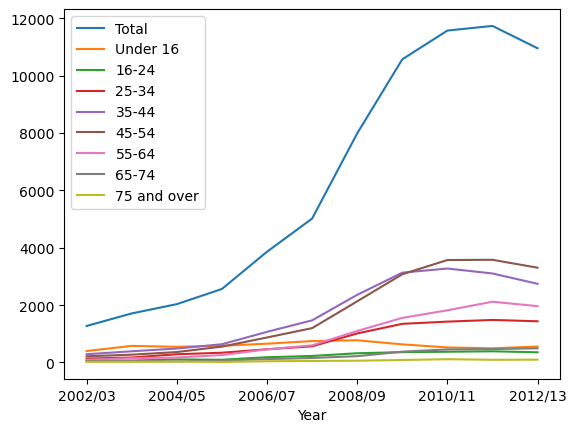

In [107]:
data_age.plot()

<AxesSubplot:xlabel='Year'>

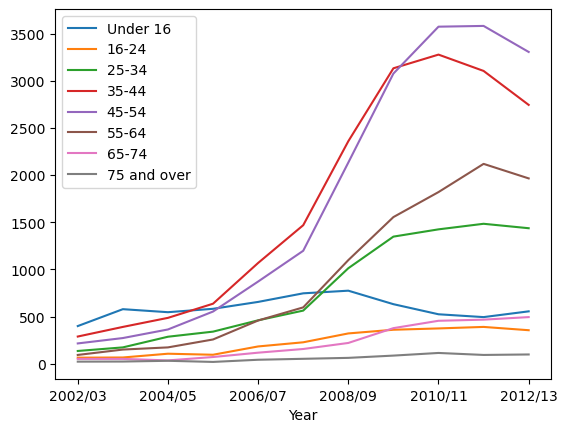

In [240]:
data_age.drop('Total',axis=1).plot()

<AxesSubplot:xlabel='Year'>

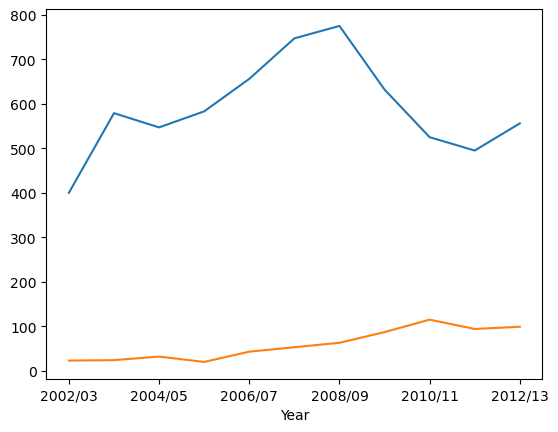

In [108]:
data_age['Under 16'].plot()
data_age['75 and over'].plot()

<AxesSubplot:xlabel='Year'>

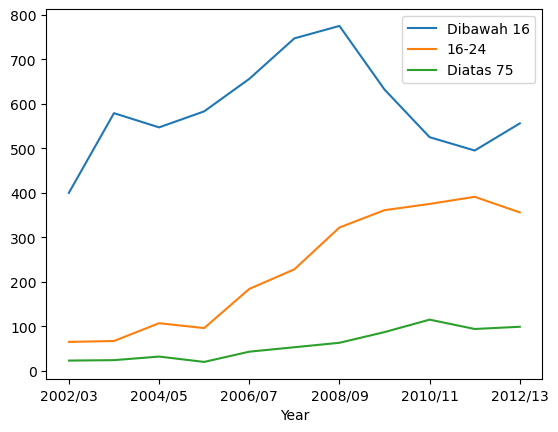

In [109]:
data_age['Under 16'].plot(label='Dibawah 16', legend=True)
data_age['16-24'].plot(label='16-24', legend=True)
data_age['75 and over'].plot(label='Diatas 75', legend=True)

<AxesSubplot:xlabel='Year'>

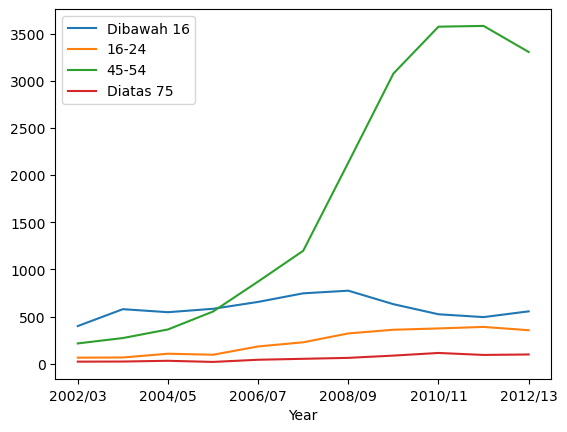

In [110]:
data_age['Under 16'].plot(label='Dibawah 16', legend=True)
data_age['16-24'].plot(label='16-24', legend=True)
data_age['45-54'].plot(label='45-54', legend=True)
data_age['75 and over'].plot(label='Diatas 75', legend=True)

Bisa disimpulkan bahwa umur 45-54 merupakan range umur yang paling rawan obesitas dan terjadi kenaikan angka obesitas tiap tahun

# DateTime/ Time Series

In [245]:
from datetime import datetime

In [246]:
date_range = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
date_range

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [247]:
169/24

7.041666666666667

In [248]:
df = pd.DataFrame(date_range,columns=['date'])
df

date
0   2020-01-01 00:00:00
1   2020-01-01 01:00:00
2   2020-01-01 02:00:00
3   2020-01-01 03:00:00
4   2020-01-01 04:00:00
..                  ...
164 2020-01-07 20:00:00
165 2020-01-07 21:00:00
166 2020-01-07 22:00:00
167 2020-01-07 23:00:00
168 2020-01-08 00:00:00

[169 rows x 1 columns]

In [249]:
len(date_range)

169

In [250]:
df['data']=np.random.randint(0,100,size=len(date_range))

In [251]:
df

date  data
0   2020-01-01 00:00:00    60
1   2020-01-01 01:00:00    13
2   2020-01-01 02:00:00    37
3   2020-01-01 03:00:00    62
4   2020-01-01 04:00:00    76
..                  ...   ...
164 2020-01-07 20:00:00    21
165 2020-01-07 21:00:00    91
166 2020-01-07 22:00:00    89
167 2020-01-07 23:00:00     3
168 2020-01-08 00:00:00    35

[169 rows x 2 columns]

In [252]:
df.head()

date  data
0 2020-01-01 00:00:00    60
1 2020-01-01 01:00:00    13
2 2020-01-01 02:00:00    37
3 2020-01-01 03:00:00    62
4 2020-01-01 04:00:00    76

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    169 non-null    datetime64[ns]
 1   data    169 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.1 KB


In [254]:
df.set_index('date',inplace=True)
df

data
date                     
2020-01-01 00:00:00    60
2020-01-01 01:00:00    13
2020-01-01 02:00:00    37
2020-01-01 03:00:00    62
2020-01-01 04:00:00    76
...                   ...
2020-01-07 20:00:00    21
2020-01-07 21:00:00    91
2020-01-07 22:00:00    89
2020-01-07 23:00:00     3
2020-01-08 00:00:00    35

[169 rows x 1 columns]

In [255]:
string_date_range_2=['June-01-2020', 'June-02-2020','June-03-2020']
#datetime.strptime('June-01-2020', '%B-%d-%Y')
print([x+'HAHA' for x in string_date_range_2]) #list comprehension
timestamp_date_range_2 = [datetime.strptime(x, '%B-%d-%Y') for x in string_date_range_2]
timestamp_date_range_2

['June-01-2020HAHA', 'June-02-2020HAHA', 'June-03-2020HAHA']


[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [256]:
datetime.strptime('June-01-2020', '%B-%d-%Y')

datetime.datetime(2020, 6, 1, 0, 0)

In [257]:
df2 = pd.DataFrame(timestamp_date_range_2,columns=['date'])
df2

date
0 2020-06-01
1 2020-06-02
2 2020-06-03

In [258]:
list_a =[1,2,3,4,5]
list_comp = [x**2 for x in list_a]
list_comp

[1, 4, 9, 16, 25]

In [259]:
df[df.index.year==2020]

data
date                     
2020-01-01 00:00:00    60
2020-01-01 01:00:00    13
2020-01-01 02:00:00    37
2020-01-01 03:00:00    62
2020-01-01 04:00:00    76
...                   ...
2020-01-07 20:00:00    21
2020-01-07 21:00:00    91
2020-01-07 22:00:00    89
2020-01-07 23:00:00     3
2020-01-08 00:00:00    35

[169 rows x 1 columns]

In [260]:
df[df.index.day==6]

data
date                     
2020-01-06 00:00:00     0
2020-01-06 01:00:00    63
2020-01-06 02:00:00    91
2020-01-06 03:00:00    73
2020-01-06 04:00:00    46
2020-01-06 05:00:00     3
2020-01-06 06:00:00    28
2020-01-06 07:00:00    76
2020-01-06 08:00:00     5
2020-01-06 09:00:00    71
2020-01-06 10:00:00    44
2020-01-06 11:00:00    36
2020-01-06 12:00:00    67
2020-01-06 13:00:00    47
2020-01-06 14:00:00    41
2020-01-06 15:00:00    50
2020-01-06 16:00:00    26
2020-01-06 17:00:00    42
2020-01-06 18:00:00    56
2020-01-06 19:00:00    37
2020-01-06 20:00:00    27
2020-01-06 21:00:00    99
2020-01-06 22:00:00    90
2020-01-06 23:00:00    33

In [261]:
df3 = df.reset_index()

In [262]:
df3[df3.date.day==1]

AttributeError: 'Series' object has no attribute 'day'

In [263]:
df[df.index.day==1]

data
date                     
2020-01-01 00:00:00    60
2020-01-01 01:00:00    13
2020-01-01 02:00:00    37
2020-01-01 03:00:00    62
2020-01-01 04:00:00    76
2020-01-01 05:00:00    45
2020-01-01 06:00:00     9
2020-01-01 07:00:00     1
2020-01-01 08:00:00    77
2020-01-01 09:00:00    70
2020-01-01 10:00:00    77
2020-01-01 11:00:00    28
2020-01-01 12:00:00    86
2020-01-01 13:00:00    96
2020-01-01 14:00:00    39
2020-01-01 15:00:00    15
2020-01-01 16:00:00    14
2020-01-01 17:00:00    36
2020-01-01 18:00:00    42
2020-01-01 19:00:00    16
2020-01-01 20:00:00    29
2020-01-01 21:00:00    63
2020-01-01 22:00:00    11
2020-01-01 23:00:00    48

In [264]:
df.loc['2020-01-01':'2020-01-03']

data
date                     
2020-01-01 00:00:00    60
2020-01-01 01:00:00    13
2020-01-01 02:00:00    37
2020-01-01 03:00:00    62
2020-01-01 04:00:00    76
...                   ...
2020-01-03 19:00:00    34
2020-01-03 20:00:00    98
2020-01-03 21:00:00    31
2020-01-03 22:00:00    80
2020-01-03 23:00:00     2

[72 rows x 1 columns]

In [265]:
df.loc['2020-01-05'].mean()

data    38.583333
dtype: float64

In [266]:
df.resample('D').mean()

data
date                 
2020-01-01  43.750000
2020-01-02  58.583333
2020-01-03  51.500000
2020-01-04  41.000000
2020-01-05  38.583333
2020-01-06  47.958333
2020-01-07  47.083333
2020-01-08  35.000000

In [267]:
df.resample('Y').mean()

data
date                 
2020-12-31  46.852071

### Rolling

In [269]:
df

data
date                     
2020-01-01 00:00:00    60
2020-01-01 01:00:00    13
2020-01-01 02:00:00    37
2020-01-01 03:00:00    62
2020-01-01 04:00:00    76
...                   ...
2020-01-07 20:00:00    21
2020-01-07 21:00:00    91
2020-01-07 22:00:00    89
2020-01-07 23:00:00     3
2020-01-08 00:00:00    35

[169 rows x 1 columns]

In [270]:
df['rolling']=df.rolling(3).sum()
df

data  rolling
date                              
2020-01-01 00:00:00    60      NaN
2020-01-01 01:00:00    13      NaN
2020-01-01 02:00:00    37    110.0
2020-01-01 03:00:00    62    112.0
2020-01-01 04:00:00    76    175.0
...                   ...      ...
2020-01-07 20:00:00    21    116.0
2020-01-07 21:00:00    91    119.0
2020-01-07 22:00:00    89    201.0
2020-01-07 23:00:00     3    183.0
2020-01-08 00:00:00    35    127.0

[169 rows x 2 columns]

## Time Series from Dataset

In [272]:
opsd_daily = pd.read_csv('opsd_germany_daily.csv')
opsd_daily

Date  Consumption     Wind   Solar  Wind+Solar
0     2006-01-01   1069.18400      NaN     NaN         NaN
1     2006-01-02   1380.52100      NaN     NaN         NaN
2     2006-01-03   1442.53300      NaN     NaN         NaN
3     2006-01-04   1457.21700      NaN     NaN         NaN
4     2006-01-05   1477.13100      NaN     NaN         NaN
...          ...          ...      ...     ...         ...
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156

[4383 rows x 5 columns]

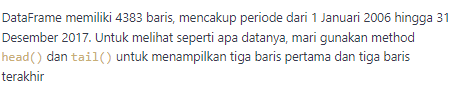

In [273]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [274]:
pd.to_datetime(opsd_daily.Date)

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: Date, Length: 4383, dtype: datetime64[ns]

In [275]:
opsd_daily['Date'] = pd.to_datetime(opsd_daily['Date'])
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [276]:
opsd_daily.set_index('Date',inplace=True)

In [278]:
opsd_daily[opsd_daily.index.year>=2015]

Consumption     Wind   Solar  Wind+Solar
Date                                                
2015-01-01   1111.33600  325.128  17.079     342.207
2015-01-02   1300.88400  603.558   7.758     611.316
2015-01-03   1265.27100  462.953   7.236     470.189
2015-01-04   1198.85400  385.024  19.984     405.008
2015-01-05   1449.86100  216.543  26.524     243.067
...                 ...      ...     ...         ...
2017-12-27   1263.94091  394.507  16.530     411.037
2017-12-28   1299.86398  506.424  14.162     520.586
2017-12-29   1295.08753  584.277  29.854     614.131
2017-12-30   1215.44897  721.247   7.467     728.714
2017-12-31   1107.11488  721.176  19.980     741.156

[1096 rows x 4 columns]

### tambahkan kolom year month date

In [279]:
opsd_daily['year'] = opsd_daily.index.year
opsd_daily['month'] = opsd_daily.index.month
opsd_daily['day'] = opsd_daily.index.day
opsd_daily

Consumption     Wind   Solar  Wind+Solar  year  month  day
Date                                                                  
2006-01-01   1069.18400      NaN     NaN         NaN  2006      1    1
2006-01-02   1380.52100      NaN     NaN         NaN  2006      1    2
2006-01-03   1442.53300      NaN     NaN         NaN  2006      1    3
2006-01-04   1457.21700      NaN     NaN         NaN  2006      1    4
2006-01-05   1477.13100      NaN     NaN         NaN  2006      1    5
...                 ...      ...     ...         ...   ...    ...  ...
2017-12-27   1263.94091  394.507  16.530     411.037  2017     12   27
2017-12-28   1299.86398  506.424  14.162     520.586  2017     12   28
2017-12-29   1295.08753  584.277  29.854     614.131  2017     12   29
2017-12-30   1215.44897  721.247   7.467     728.714  2017     12   30
2017-12-31   1107.11488  721.176  19.980     741.156  2017     12   31

[4383 rows x 7 columns]

In [280]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   year         4383 non-null   int64  
 5   month        4383 non-null   int64  
 6   day          4383 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 273.9 KB


In [281]:
opsd_daily.loc['2015-09':'2017-10']

Consumption     Wind    Solar  Wind+Solar  year  month  day
Date                                                                   
2015-09-01   1454.19300  221.322   94.596     315.918  2015      9    1
2015-09-02   1431.18600  182.791  120.108     302.899  2015      9    2
2015-09-03   1424.91300  113.314   91.536     204.850  2015      9    3
2015-09-04   1398.09000  240.758  123.201     363.959  2015      9    4
2015-09-05   1188.41000  446.861   95.646     542.507  2015      9    5
...                 ...      ...      ...         ...   ...    ...  ...
2017-10-27   1480.50323  528.191   52.371     580.562  2017     10   27
2017-10-28   1284.26158  819.818   26.799     846.617  2017     10   28
2017-10-29   1176.91823  720.079   52.222     772.301  2017     10   29
2017-10-30   1345.87389  407.052   69.881     476.933  2017     10   30
2017-10-31   1204.08577  256.960   56.767     313.727  2017     10   31

[792 rows x 7 columns]

In [282]:
opsd_daily.loc['2015-01-01':'2016-12-31']

Consumption     Wind   Solar  Wind+Solar  year  month  day
Date                                                                  
2015-01-01     1111.336  325.128  17.079     342.207  2015      1    1
2015-01-02     1300.884  603.558   7.758     611.316  2015      1    2
2015-01-03     1265.271  462.953   7.236     470.189  2015      1    3
2015-01-04     1198.854  385.024  19.984     405.008  2015      1    4
2015-01-05     1449.861  216.543  26.524     243.067  2015      1    5
...                 ...      ...     ...         ...   ...    ...  ...
2016-12-27     1289.324  640.895  23.448     664.343  2016     12   27
2016-12-28     1294.881  214.990  19.450     234.440  2016     12   28
2016-12-29     1295.897  167.698  42.910     210.608  2016     12   29
2016-12-30     1291.044  239.257  48.546     287.803  2016     12   30
2016-12-31     1212.568  315.063  34.580     349.643  2016     12   31

[731 rows x 7 columns]

<AxesSubplot:xlabel='Date'>

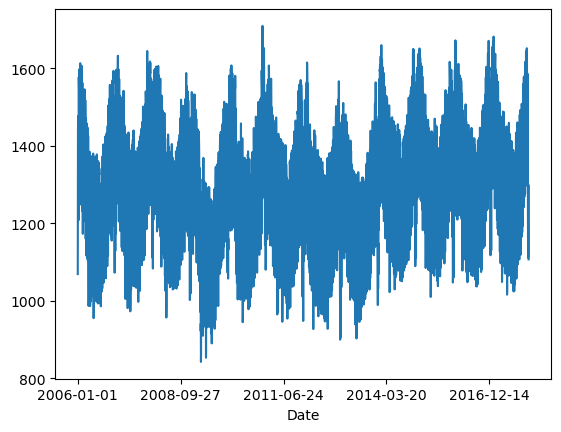

In [180]:
opsd_daily['Consumption'].plot()

<AxesSubplot:xlabel='Date'>

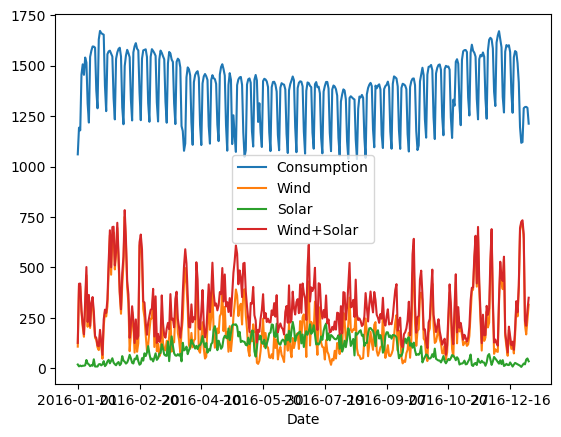

In [177]:
opsd_daily.loc['2016':'2017'].plot()

<AxesSubplot:xlabel='Date'>

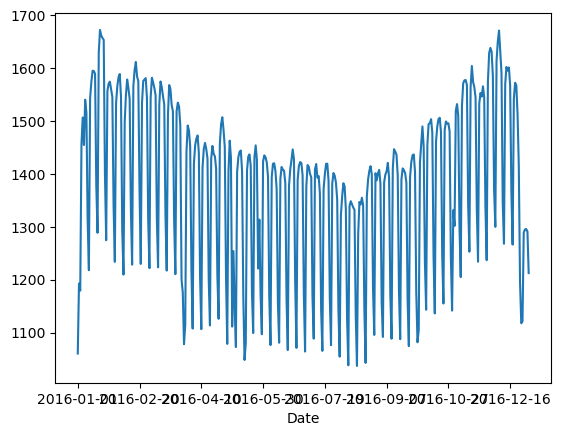

In [179]:
opsd_daily.loc['2016':'2017']['Consumption'].plot()

<AxesSubplot:xlabel='Date'>

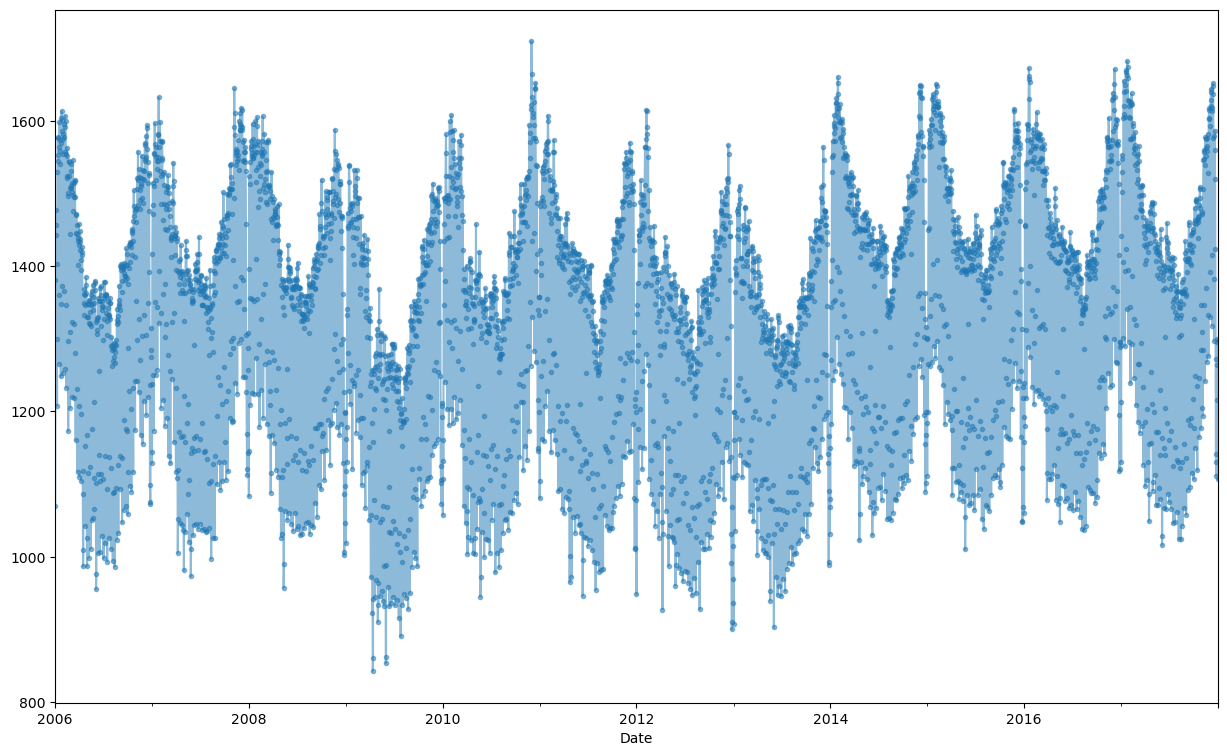

In [283]:
opsd_daily['Consumption'].plot(marker='.',linestyle=None,figsize=(15,9),alpha=0.5)

<AxesSubplot:xlabel='Date'>

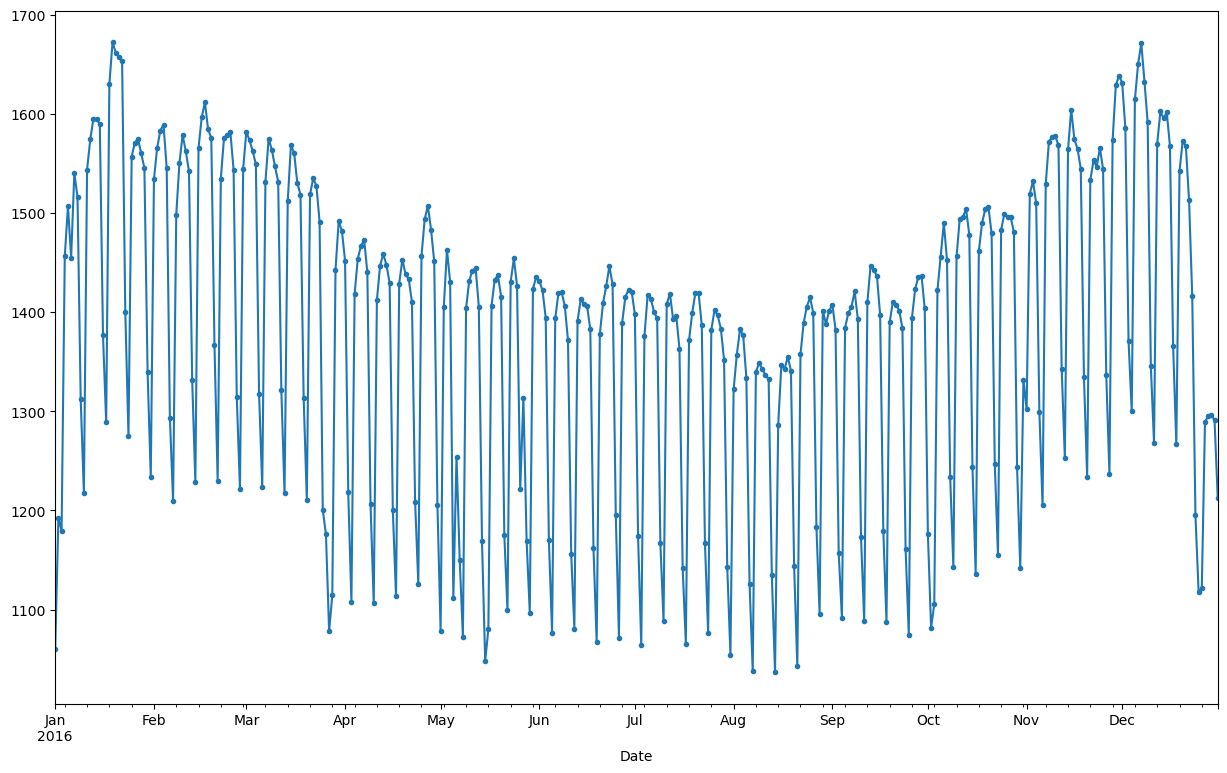

In [284]:
opsd_daily.loc['2016']['Consumption'].plot(marker='.',linestyle=None,figsize=(15,9),alpha=1)

# PR = QUIZ 2
* Dengan menggunakan For Loop dan Try Except ubah 'HURLEY' pada NUM_BATH menjadi Nan
* Replace value NaN pada NUM_BATH menjadi median dari data NUM_BATH

In [290]:
df = pd.read_csv('property_data.csv')
df

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2   HURLEY   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800

In [291]:
cnt = 0
for row in df['NUM_BATH']:
    try:
        float(row)
        pass
    except ValueError:
        df.loc[cnt,'NUM_BATH'] = np.nan
    cnt+=1

df

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      NaN   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2      NaN   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800

In [292]:
df['NUM_BATH'].fillna(df['NUM_BATH'].median(),inplace=True)
df

PID  ST_NUM     ST_NAME OWN_OCCUPIED NUM_BEDROOMS NUM_BATH SQ_FT
0  100001000.0   104.0      PUTNAM            Y            3        1  1000
1  100002000.0   197.0   LEXINGTON            N            3      1.5    --
2  100003000.0     NaN   LEXINGTON            N          NaN        1   850
3  100004000.0   201.0    BERKELEY           12            1      1.0   700
4          NaN   203.0    BERKELEY            Y            3        2  1600
5  100006000.0   207.0    BERKELEY            Y          NaN        1   800
6  100007000.0     NaN  WASHINGTON          NaN            2      1.0   950
7  100008000.0   213.0     TREMONT            Y           --        1   NaN
8  100009000.0   215.0     TREMONT            Y           na        2  1800

### Nadia Syachrani